## **Importing necessary libraries and Data Loading**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
devs = tf.config.list_physical_devices('GPU')
for dev in devs:
    tf.config.experimental.set_memory_growth(dev, True)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Load the dataset
file_path = '/TSLA_stock_data.csv'  # Change to your dataset file path
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

## **Basic Exploration**

In [ ]:
# Basic Data Exploration
print("### Data Information ###")
print(data.info())
print("\n### Data Description ###")
print(data.describe())

# Check for missing values
print("\n### Missing Values ###")
print(data.isnull().sum())

# Handling Missing Values (if any)
data = data.dropna()  # Dropping rows with missing values

# Display first few rows
print("\n### Sample Data ###")
print(data.head())


### Data Information ###
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2010-06-29 to 2024-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3592 non-null   float64
 1   High       3592 non-null   float64
 2   Low        3592 non-null   float64
 3   Close      3592 non-null   float64
 4   Adj Close  3592 non-null   float64
 5   Volume     3592 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.4 KB
None

### Data Description ###
              Open         High          Low        Close    Adj Close  \
count  3592.000000  3592.000000  3592.000000  3592.000000  3592.000000   
mean     77.446837    79.142413    75.643622    77.431415    77.431415   
std     103.266198   105.554437   100.778725   103.198204   103.198204   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.801500    12.068833    11.534000    11.858333    11.858333   
50% 

## **Time Series Decomposition**

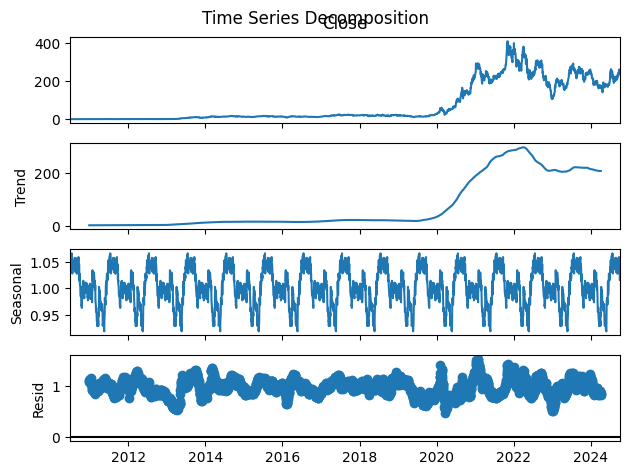

In [ ]:
# Time Series Decomposition
decompose_result = seasonal_decompose(data['Close'].dropna(), model='multiplicative', period=252)
decompose_result.plot()
plt.suptitle('Time Series Decomposition')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def regression_metrics(y_test, y_pred):

    # calculate errors

    mse = mean_squared_error(y_test, y_pred)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    eps = 1e-10 # a small value to avoid division by zero

    rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / (y_test + eps)))))

    #rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred)/y_test)), axis=0))

    mae = mean_absolute_error(y_test, y_pred)

    mape = mean_absolute_percentage_error(y_test, y_pred)

    r2_score = sklearn.metrics.r2_score(y_test, y_pred)

    # report error

    print(f'Mean Squared Error: {mse}')

    print(f'Root Mean Square Error: {rmse}')

    print(f'Root Mean Square Percentage Error: {rmspe}')

    print(f'Mean Absolute Error: {mae}')

    print(f'Mean Absolute Percentage Error: {mape}')

    print(f'R2 score: {r2_score}')



# Activation functions for comparing
* ReLU
* Tanh
* GELU
* Proposed 1

# Custom Activation Functions

proposed function 1

In [ ]:
def custom_activation(x):
    return tf.where(x >= 0, tf.tanh(x), tf.atan(x))


proposed function 2

In [ ]:
def custom_act(x):
    return tf.where(x>=0, x, tf.tanh(x)+tf.atan(x))

#Model 1 with relu

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 60, 16)              │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 60, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 32)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,593 (17.94 KB)

 Trainable params: 4,593 (17.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.5983 - mae: 0.0833 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3058 - mae: 0.0759 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1824 - mae: 0.0479 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1286 - mae: 0.0339 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0997 - mae: 0.0357 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0815 - mae: 0.0337 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0671 - mae: 0.0302 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0571 - mae: 0.0321 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0493 - mae: 0.0341 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.04

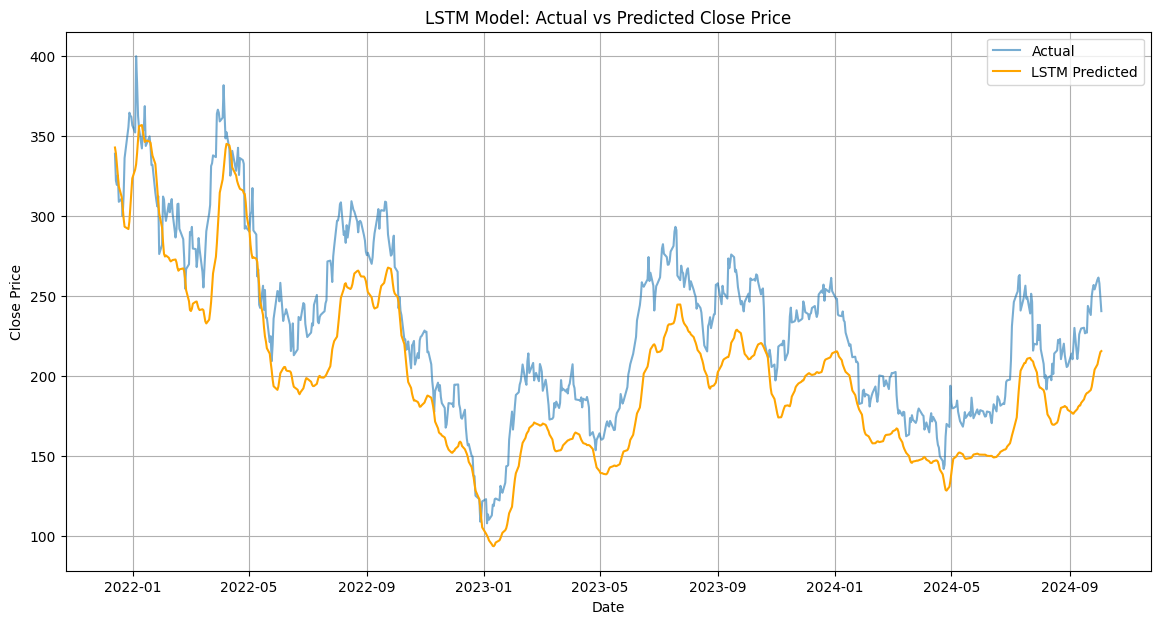

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, Dense, Bidirectional, LSTM, Dropout
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model
input_layer = Input(shape=(X_train_lstm.shape[1], 1))

# Increased L2 regularization strength
l2_strength = 0.005

# CNN block
nb_filters = 16  # Reduced number of filters
kernel_size = 3
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Activation('relu')(cnn_conv1)

# BiLSTM layer with more regularization and dropout
bilstm_layer = Bidirectional(LSTM(16, activation='relu', return_sequences=False,
                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
dropout_layer = Dropout(0.4)(bilstm_layer)  # Increased dropout

# Dense layers with regularization
dense1 = Dense(8, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dropout_layer)
dense2 = Dense(4, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
model_lstm = Model(inputs=input_layer, outputs=output_layer)
model_lstm.summary()

# Compile the model
calls = [EarlyStopping(monitor='loss', patience=15), ReduceLROnPlateau(monitor='loss', patience=3)]
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)

# Regression metrics
mae = mean_absolute_error(y_test_lstm, lstm_predictions)
mse = mean_squared_error(y_test_lstm, lstm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm, lstm_predictions)

# Printing metrics rounded to 6 decimal places
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R2 Score: {r2:.6f}")

# Reverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 1 with Tanh

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.2401 - mae: 0.0540 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1172 - mae: 0.0127 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0741 - mae: 0.0092 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0533 - mae: 0.0089 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0407 - mae: 0.0073 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0318 - mae: 0.0072 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0250 - mae: 0.0068 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0203 - mae: 0.0123 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0160 - mae: 0.0079 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.01

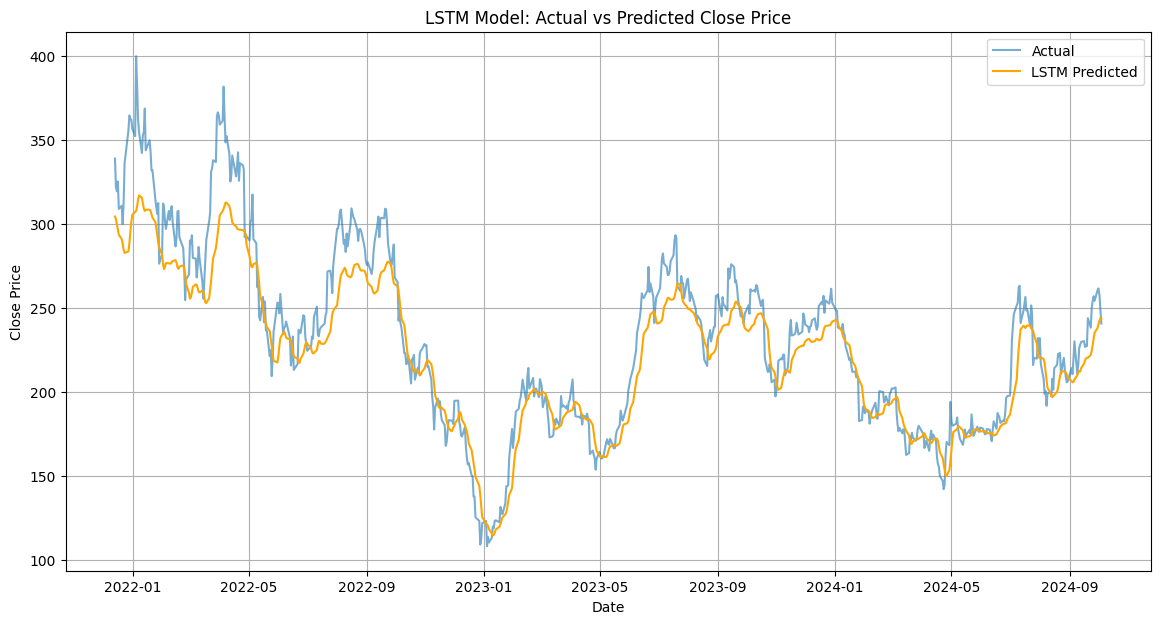

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation('tanh')(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, activation='tanh', return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)



# Dense layers

dense1 = Dense(16, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)

dense2 = Dense(8, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_lstm = Model(inputs=input_layer, outputs=output_layer)

model_lstm.summary()

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1,callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 1 with GELU

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.2370 - mae: 0.0810 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0972 - mae: 0.0187 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0605 - mae: 0.0172 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0450 - mae: 0.0141 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0360 - mae: 0.0146 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0292 - mae: 0.0133 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0239 - mae: 0.0127 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0197 - mae: 0.0127 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0164 - mae: 0.0137 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.01

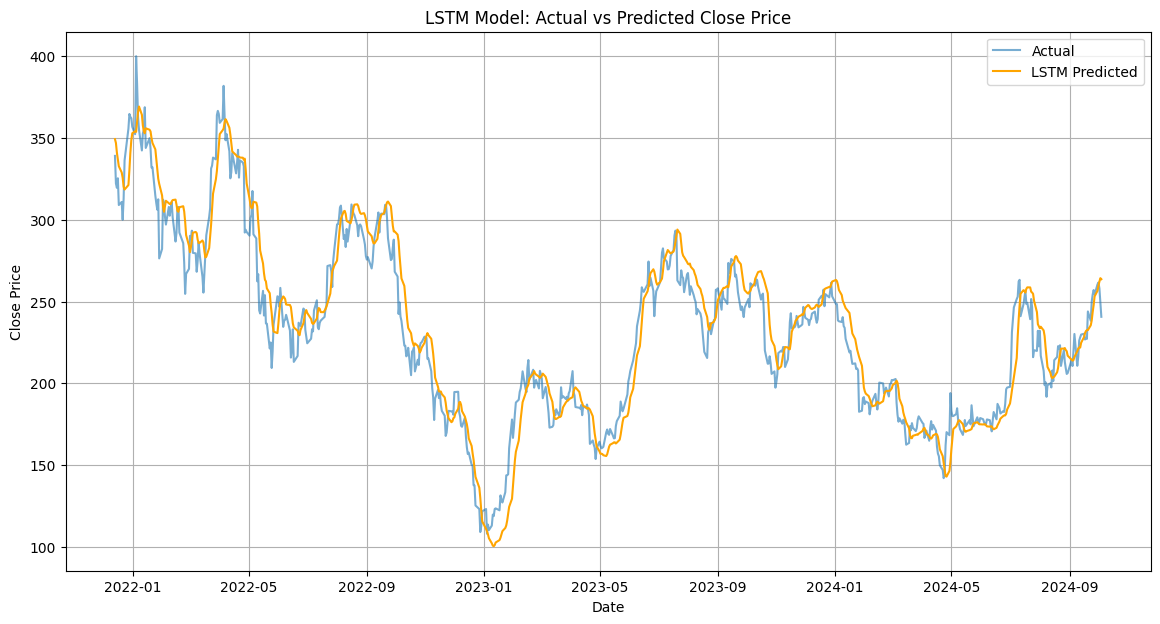

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 =Activation('gelu')(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer = Activation('gelu')(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Activation('gelu')(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Activation('gelu')(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_lstm = Model(inputs=input_layer, outputs=output_layer)

model_lstm.summary()

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 1 with proposed function 1

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 60, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_3 (Lambda)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.1112 - mae: 0.0202 - learning_rate: 0.0010
Epoch 2/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0525 - mae: 0.0088 - learning_rate: 0.0010
Epoch 3/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0324 - mae: 0.0087 - learning_rate: 0.0010
Epoch 4/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0235 - mae: 0.0079 - learning_rate: 0.0010
Epoch 5/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0181 - mae: 0.0075 - learning_rate: 0.0010
Epoch 6/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0145 - mae: 0.0075 - learning_rate: 0.0010
Epoch 7/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0117 - mae: 0.0088 - learning_rate: 0.0010
Epoch 8/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0094 - mae: 0.0069 - learning_rate: 0.0010
Epoch 9/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0077 - mae: 0.0089 - learning_rate: 0.0010
Epoch 10/70
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0

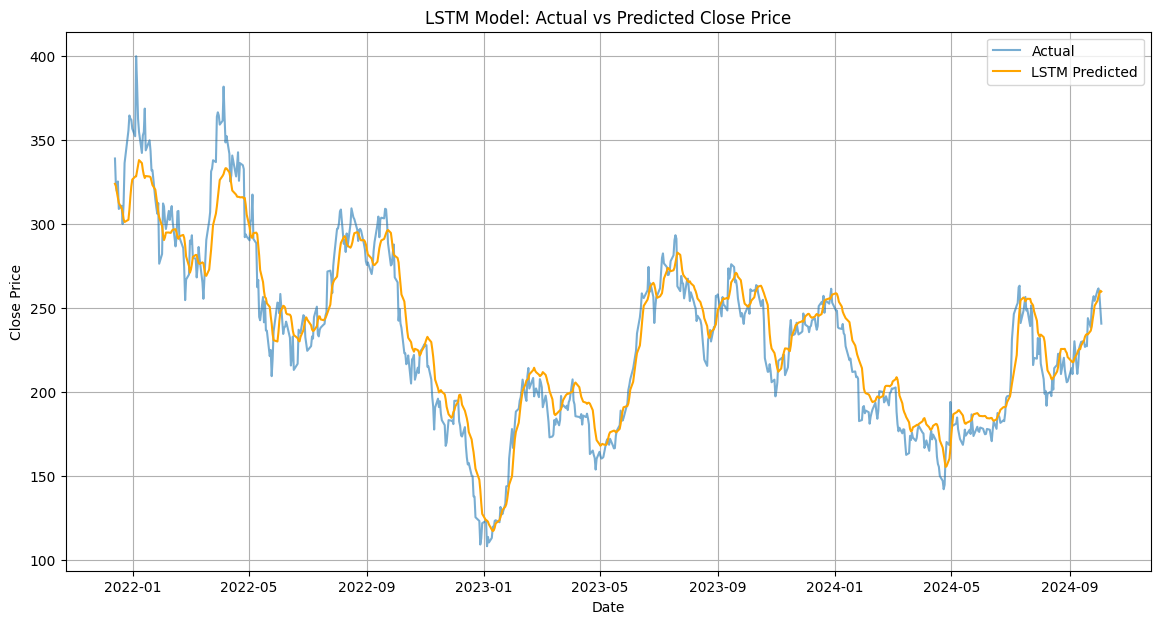

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv1D, Dense, Bidirectional, LSTM, Activation, Lambda
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Define the custom activation function
def custom_activation(x):
    return tf.where(x >= 0, tf.tanh(x), tf.atan(x))

# Load data
data_path = '/TSLA_stock_data.csv'  # Replace with your dataset's actual path
if not os.path.exists(data_path):
    raise FileNotFoundError(f"The file '{data_path}' does not exist.")

data = pd.read_csv(data_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Ensure the dataset has a 'Close' column
if 'Close' not in data.columns:
    raise ValueError("The dataset must contain a 'Close' column.")

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model
input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.0005  # Reduced L2 regularization strength

# CNN block
nb_filters = 32
kernel_size = 3
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Lambda(custom_activation)(cnn_conv1)  # Apply custom activation

# BiLSTM layer with custom activation
bilstm_layer = Bidirectional(LSTM(
    32,
    return_sequences=False,
    kernel_regularizer=l2(l2_strength),
    recurrent_regularizer=l2(l2_strength),
    bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_activation = Lambda(custom_activation)(bilstm_layer)  # Apply custom activation

# Dense layers with reduced units and custom activation
dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_activation)
dense1_activation = Lambda(custom_activation)(dense1)  # Apply custom activation

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1_activation)
dense2_activation = Lambda(custom_activation)(dense2)  # Apply custom activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2_activation)

# Combine the model
model_lstm = Model(inputs=input_layer, outputs=output_layer)
model_lstm.summary()

# Compile the model
calls = [EarlyStopping(monitor='loss', patience=20), ReduceLROnPlateau(monitor='loss', patience=5)]
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=70, batch_size=32, verbose=1, callbacks=calls)  # Increased epochs

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)

# Regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test_lstm, lstm_predictions)
mse = mean_squared_error(y_test_lstm, lstm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm, lstm_predictions)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Reverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 60, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_4 (Lambda)                    │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_5 (Lambda)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_6 (Lambda)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_7 (Lambda)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - loss: 0.2266 - mae: 0.0437 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.1051 - mae: 0.0094 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0644 - mae: 0.0103 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0462 - mae: 0.0078 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0355 - mae: 0.0068 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0280 - mae: 0.0072 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0224 - mae: 0.0092 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0179 - mae: 0.0060 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0145 - mae: 0.0072 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0

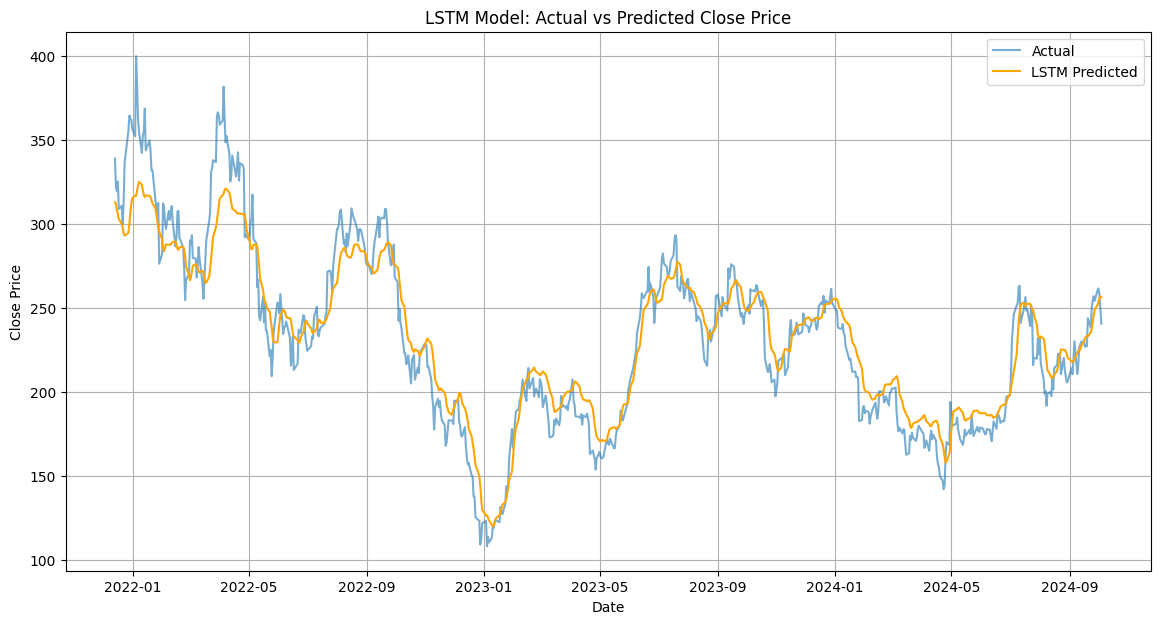

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv1D, Dense, Bidirectional, LSTM, Activation, Lambda
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Define the custom activation function
def custom_activation(x):
    return tf.where(x >= 0, tf.tanh(x), tf.atan(x))

# Load data
data_path = '/TSLA_stock_data.csv'  # Replace with your dataset's actual path
if not os.path.exists(data_path):
    raise FileNotFoundError(f"The file '{data_path}' does not exist.")

data = pd.read_csv(data_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Ensure the dataset has a 'Close' column
if 'Close' not in data.columns:
    raise ValueError("The dataset must contain a 'Close' column.")

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model
input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001

# CNN block
nb_filters = 32
kernel_size = 3
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Lambda(custom_activation)(cnn_conv1)  # Apply custom activation

# BiLSTM layer with custom activation
bilstm_layer = Bidirectional(LSTM(
    32,
    return_sequences=False,
    kernel_regularizer=l2(l2_strength),
    recurrent_regularizer=l2(l2_strength),
    bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_activation = Lambda(custom_activation)(bilstm_layer)  # Apply custom activation

# Dense layers with custom activation
dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_activation)
dense1_activation = Lambda(custom_activation)(dense1)  # Apply custom activation

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1_activation)
dense2_activation = Lambda(custom_activation)(dense2)  # Apply custom activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2_activation)

# Combine the model
model_lstm = Model(inputs=input_layer, outputs=output_layer)
model_lstm.summary()

# Compile the model
calls = [EarlyStopping(monitor='loss', patience=15), ReduceLROnPlateau(monitor='loss', patience=3)]
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)

# Regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test_lstm, lstm_predictions)
mse = mean_squared_error(y_test_lstm, lstm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm, lstm_predictions)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Reverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 1 with Proposed function 2

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.2401 - mae: 0.0396 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1278 - mae: 0.0075 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0846 - mae: 0.0085 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0623 - mae: 0.0067 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0478 - mae: 0.0062 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0372 - mae: 0.0055 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0291 - mae: 0.0069 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0229 - mae: 0.0075 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0178 - mae: 0.0070 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.01

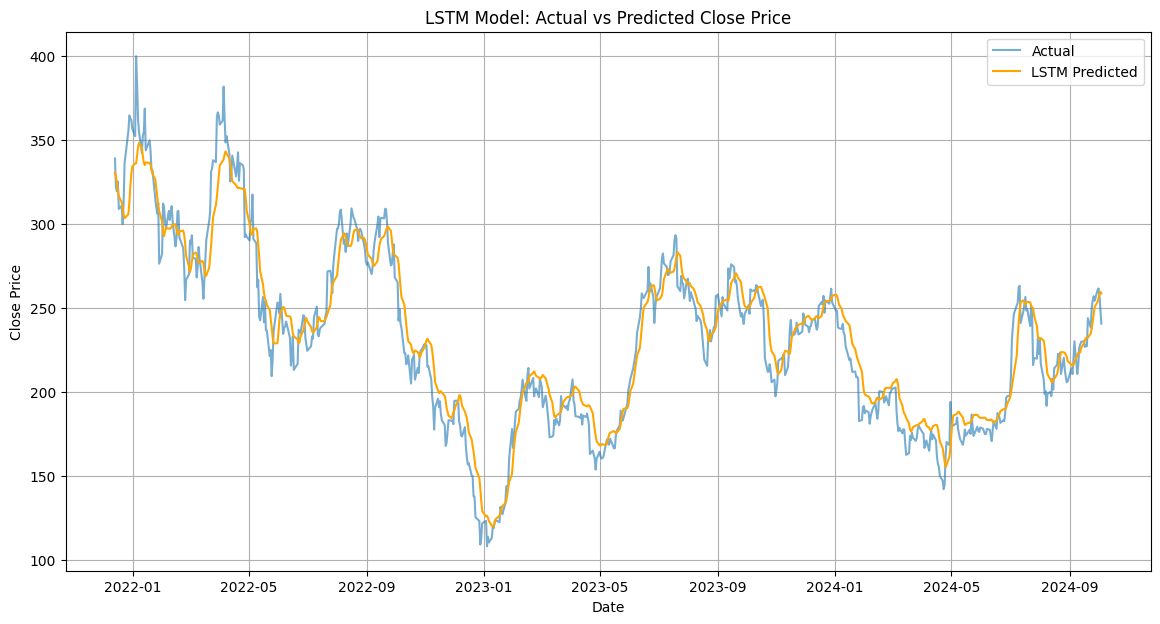

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation(custom_act)(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)


bilstm_layer=Activation(custom_act)(bilstm_layer)
# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength),activation=custom_act, bias_regularizer=l2(l2_strength))(bilstm_layer)


dense2 = Dense(8, kernel_regularizer=l2(l2_strength),activation=custom_act, bias_regularizer=l2(l2_strength))(dense1)




# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_lstm = Model(inputs=input_layer, outputs=output_layer)

model_lstm.summary()

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 2 with ReLU

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 60, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 32)                  │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,233 (20.44 KB)

 Trainable params: 5,233 (20.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.5801 - mae: 0.0793
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0223 - mae: 0.0241
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0161 - mae: 0.0192
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0147 - mae: 0.0196
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0137 - mae: 0.0183
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0132 - mae: 0.0190
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0126 - mae: 0.0208
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0118 - mae: 0.0165
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0115 - mae: 0.0175
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0112 - mae: 0.0190
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0108 - mae: 0.0157
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0103 - mae: 0.0140
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━

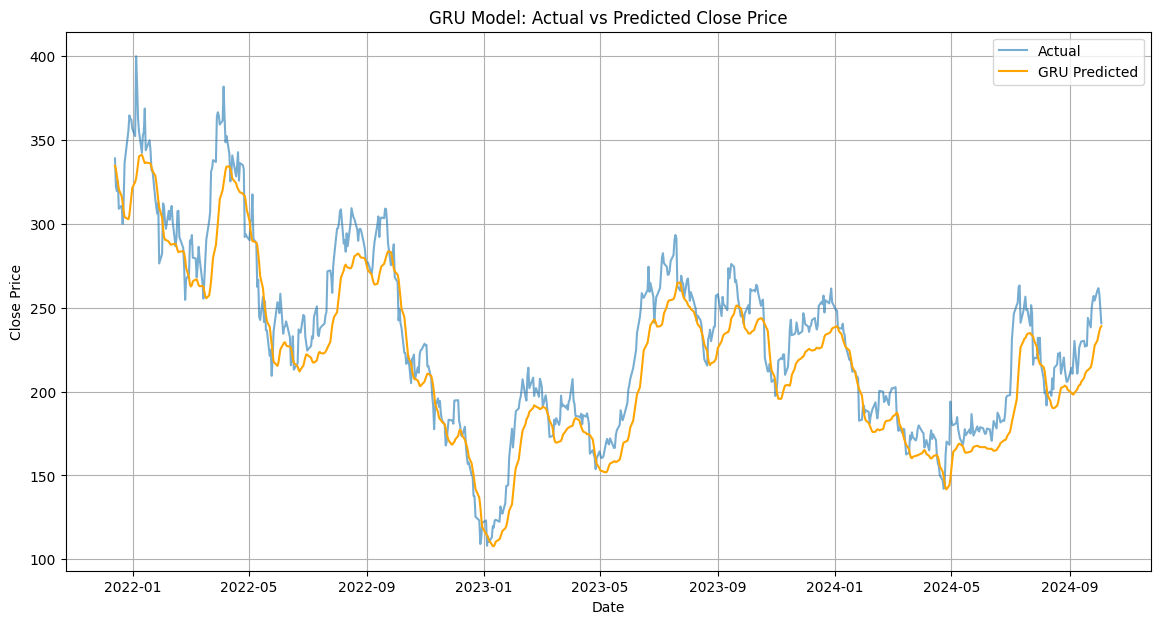

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional, Input, Conv1D, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'data' is already loaded and has a 'Close' column

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# CNN block parameters
nb_filters = 32
kernel_size = 3

# LSTM Model with CNN, BiLSTM, Dense layers
input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.01  # Increased L2 regularization to make the model less flexible

# CNN Block
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Activation('relu')(cnn_conv1)

# Add Dropout to increase error by reducing model learning
dropout_layer = Dropout(0.3)(cnn_activation1)  # Added dropout

# BiLSTM layer with regularization and dropout
bilstm_layer = Bidirectional(GRU(16, activation='relu', return_sequences=False,
                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength),
                                  bias_regularizer=l2(l2_strength)))(dropout_layer)  # Reduced GRU units

# Dense layers
dense1 = Dense(8, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)  # Reduced dense units
dense2 = Dense(4, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)  # Reduced dense units

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

# Compile model with a higher learning rate
optimizer = Adam(learning_rate=0.005)  # Increased learning rate to potentially cause instability
model_gru.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

# Predictions with GRU
gru_predictions = model_gru.predict(X_test_lstm)

# Define regression metrics (example: Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error)
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared: {r2}")

# Evaluate the model
regression_metrics(y_test_lstm, gru_predictions)

# Inverse scaling to get predictions in original scale
gru_predictions = scaler.inverse_transform(gru_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for GRU
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(gru_predictions):], gru_predictions, label='GRU Predicted', color='orange')
plt.title('GRU Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 2 with Tanh

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,985 (54.63 KB)

 Trainable params: 13,985 (54.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.1717 - mae: 0.0479 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0625 - mae: 0.0084 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0276 - mae: 0.0070 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0148 - mae: 0.0076 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0095 - mae: 0.0088 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0068 - mae: 0.0076 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0055 - mae: 0.0091 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0045 - mae: 0.0084 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0040 - mae: 0.0081 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.00

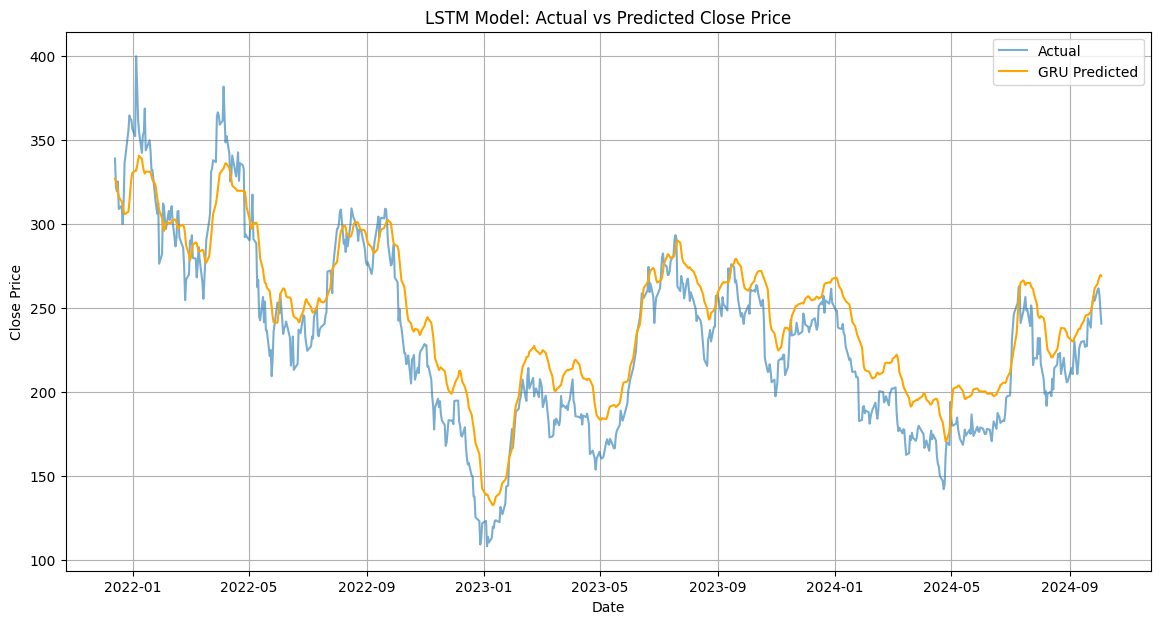

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation('tanh')(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(GRU(32, activation='tanh', return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)



# Dense layers

dense1 = Dense(16, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)

dense2 = Dense(8, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_gru.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='GRU Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 2 with GELU

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,985 (54.63 KB)

 Trainable params: 13,985 (54.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.1765 - mae: 0.0758 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0545 - mae: 0.0119 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0219 - mae: 0.0111 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0118 - mae: 0.0121 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0082 - mae: 0.0124 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0065 - mae: 0.0128 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0055 - mae: 0.0121 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0048 - mae: 0.0120 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0043 - mae: 0.0113 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0

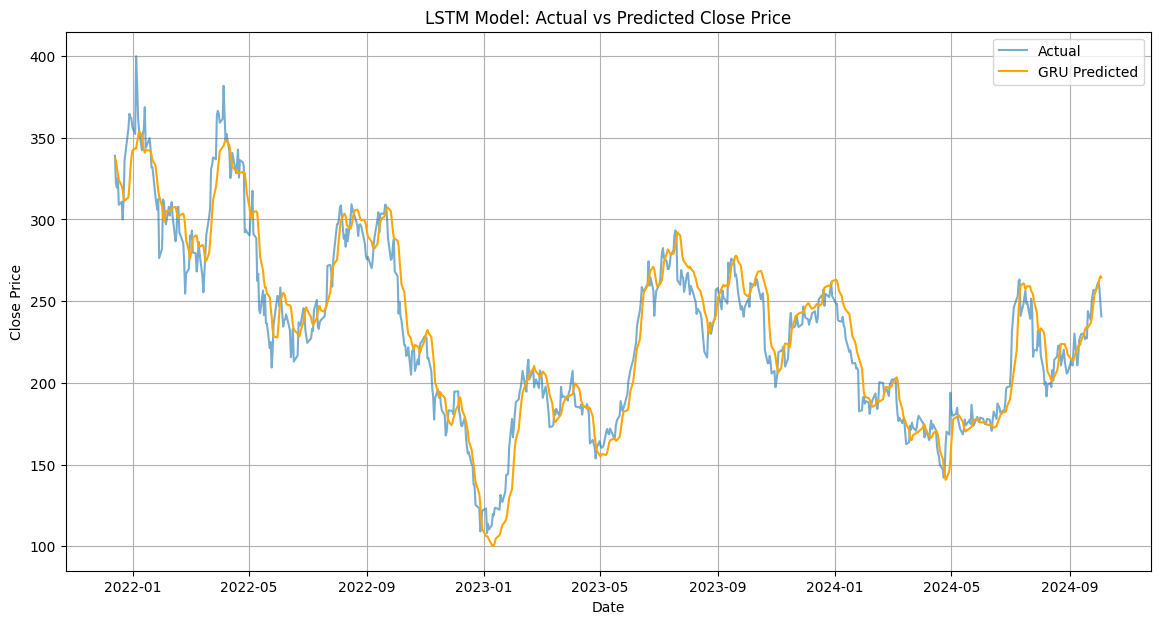

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 =Activation('gelu')(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(GRU(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer = Activation('gelu')(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Activation('gelu')(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Activation('gelu')(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_gru.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='GRU Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


## model 2 with proposed function 1


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 60, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 64)                  │          12,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,985 (54.63 KB)

 Trainable params: 13,985 (54.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - loss: 0.1740 - mae: 0.0414 - learning_rate: 0.0010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,learning_rate.
  callback.on_epoch_end(epoch, logs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0861 - mae: 0.0083 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0524 - mae: 0.0089 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0366 - mae: 0.0073 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0276 - mae: 0.0066 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0216 - mae: 0.0067 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0173 - mae: 0.0063 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0140 - mae: 0.0057 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0115 - mae: 0.0057 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0096 - mae: 0.0073 - learning_rate: 0.0010
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0080 - mae: 

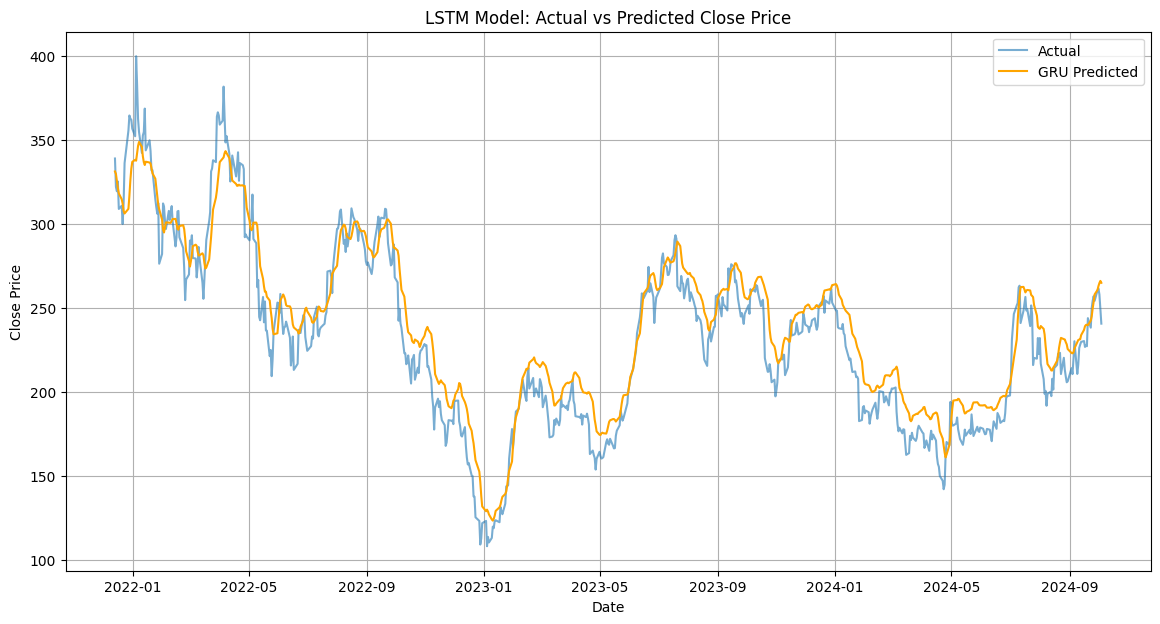

In [ ]:
  from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_activation1 = Conv1D(filters=nb_filters,activation=custom_act, kernel_size=kernel_size, padding='causal')(input_layer)





# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(GRU(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer=Activation(custom_activation)(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength),activation=custom_act, bias_regularizer=l2(l2_strength))(bilstm_layer)


dense2 = Dense(8, kernel_regularizer=l2(l2_strength),activation=custom_act, bias_regularizer=l2(l2_strength))(dense1)




# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_gru.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='GRU Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 2 with Proposed function2


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,985 (54.63 KB)

 Trainable params: 13,985 (54.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.1749 - mae: 0.0459 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0853 - mae: 0.0063 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0521 - mae: 0.0056 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0366 - mae: 0.0054 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0276 - mae: 0.0052 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0216 - mae: 0.0057 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0173 - mae: 0.0061 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0140 - mae: 0.0062 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0114 - mae: 0.0057 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.00

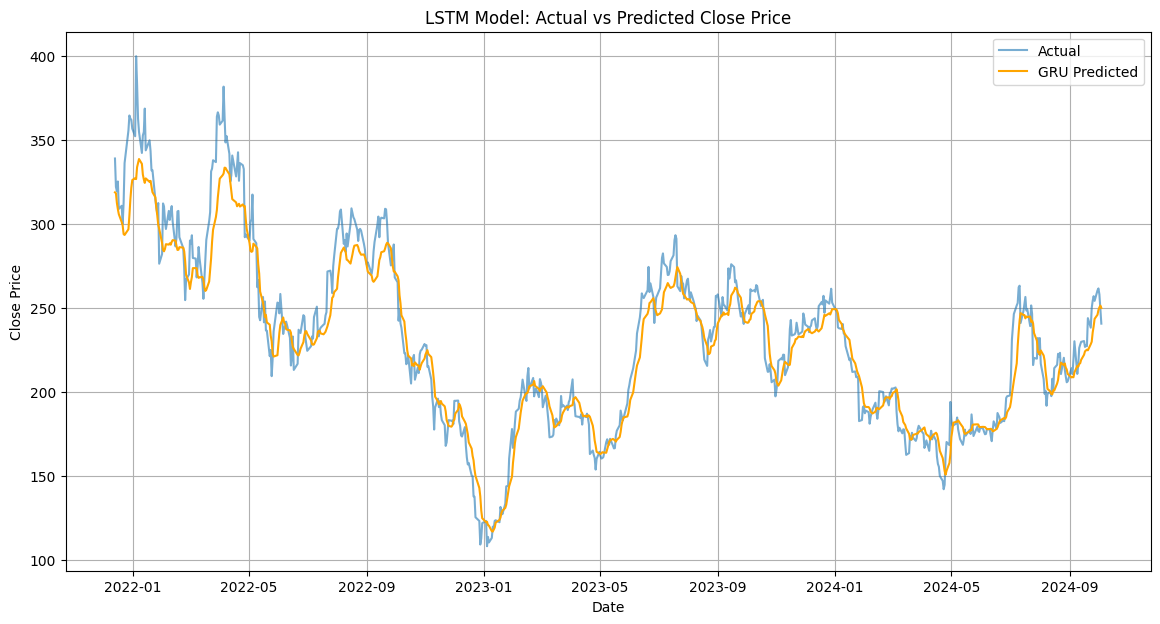

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_activation1 = Conv1D(filters=nb_filters,activation=custom_act, kernel_size=kernel_size, padding='causal')(input_layer)





# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(GRU(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer=Activation(custom_act)(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength),activation=custom_act, bias_regularizer=l2(l2_strength))(bilstm_layer)


dense2 = Dense(8, kernel_regularizer=l2(l2_strength),activation=custom_act, bias_regularizer=l2(l2_strength))(dense1)




# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_gru.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='GRU Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
